# Bank Portfolio

## Invest in Bank Stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['BAC','WFC','MS','C']
start = '2010-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  4 of 4 downloaded


,BAC,C,MS,WFC
Date,,,,
2010-01-04,14.176558,31.377235,26.338934,21.039022
2010-01-05,14.637363,32.576950,27.301834,21.616585
2010-01-06,14.809035,33.592110,27.651201,21.647402
2010-01-07,15.296949,33.684391,28.051693,22.432901
2010-01-08,15.161416,33.130672,27.480778,22.224974


In [3]:
df.tail()

,BAC,C,MS,WFC
Date,,,,
2018-12-24,22.345720,47.898232,35.965076,41.917015
2018-12-26,23.702393,50.017963,38.190422,43.830200
2018-12-27,23.957996,50.338848,38.540257,43.772518
2018-12-28,23.977657,50.397186,38.258450,44.012867
2018-12-31,24.223431,50.620831,38.530544,44.301289


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
9 years


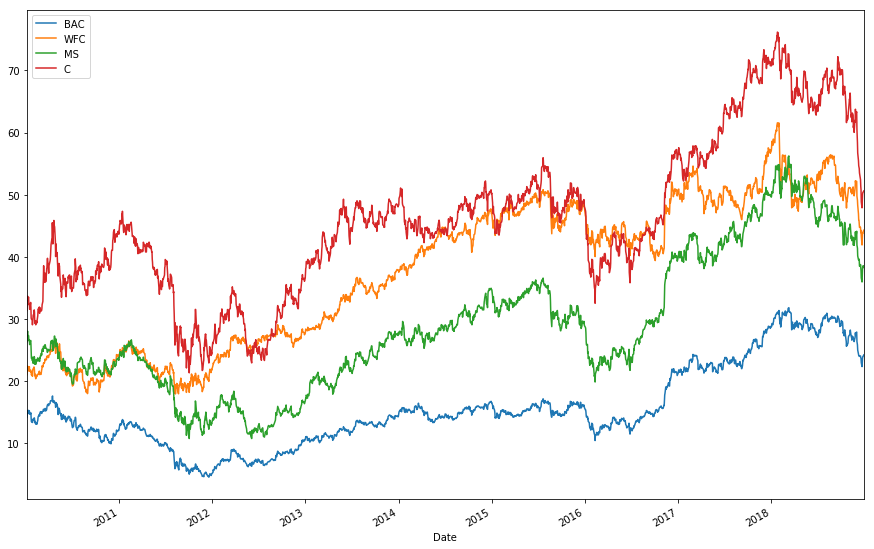

In [5]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.legend()

In [6]:
for s in symbols:
    print(s + ":",  df[s].max())

BAC: 31.820911
WFC: 61.585838
MS: 56.251183
C: 76.178528


In [7]:
for s in symbols:
    print(s + ":",  df[s].min())

BAC: 4.543722
WFC: 17.961151
MS: 10.76533
C: 21.338135


In [8]:
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = (np.log(1 + df[s].pct_change())).dropna()
    
returns.head(4)

,BAC Return,WFC Return,MS Return,C Return
Date,,,,
2010-01-05,0.031988,0.027082,0.035906,0.037522
2010-01-06,0.011660,0.001425,0.012715,0.030686
2010-01-07,0.032416,0.035643,0.014380,0.002743
2010-01-08,-0.008900,-0.009312,-0.020562,-0.016575


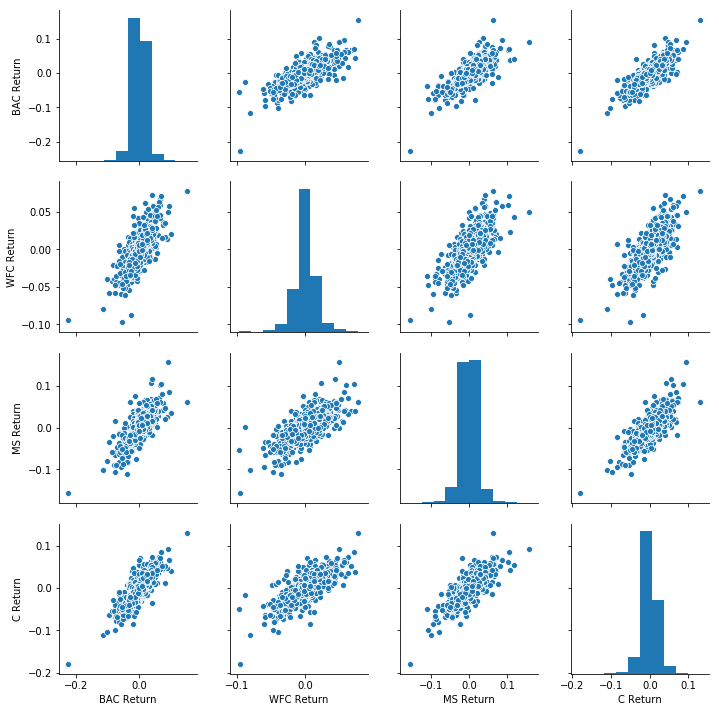

In [9]:
sns.pairplot(returns[1:])

In [10]:
# dates each bank stock had the best and worst single day returns. 
print('Best Day Returns')
print('-'*20)
print(returns.idxmax())
print('\n')
print('Worst Day Returns')
print('-'*20)
print(returns.idxmin())

Best Day Returns
--------------------
BAC Return   2011-08-09
WFC Return   2011-08-09
MS Return    2011-10-27
C Return     2011-08-09
dtype: datetime64[ns]


Worst Day Returns
--------------------
BAC Return   2011-08-08
WFC Return   2018-02-05
MS Return    2011-08-08
C Return     2011-08-08
dtype: datetime64[ns]


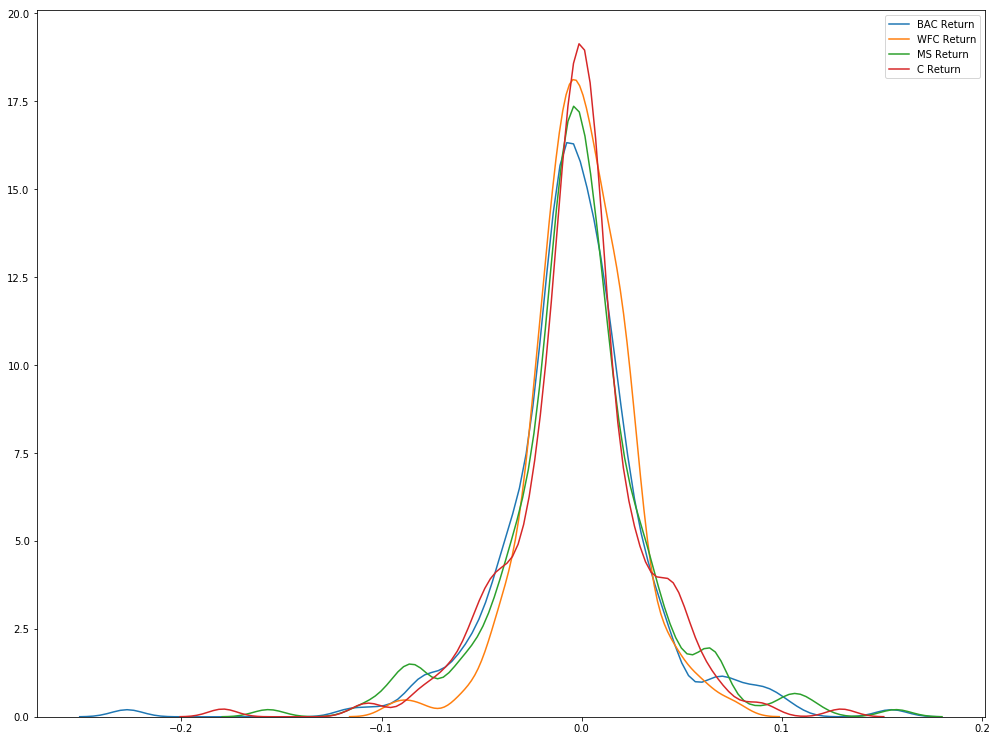

In [11]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.ix["2011-01-01" : "2011-12-31 "][r])

In [12]:
returns.corr()

,BAC Return,WFC Return,MS Return,C Return
BAC Return,1.000000,0.757169,0.795558,0.832349
WFC Return,0.757169,1.000000,0.725683,0.750073
MS Return,0.795558,0.725683,1.000000,0.808386
C Return,0.832349,0.750073,0.808386,1.000000


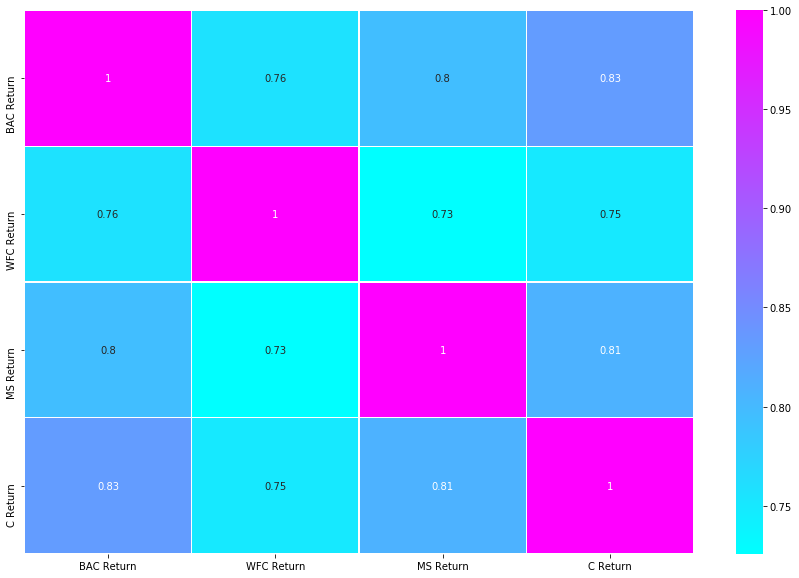

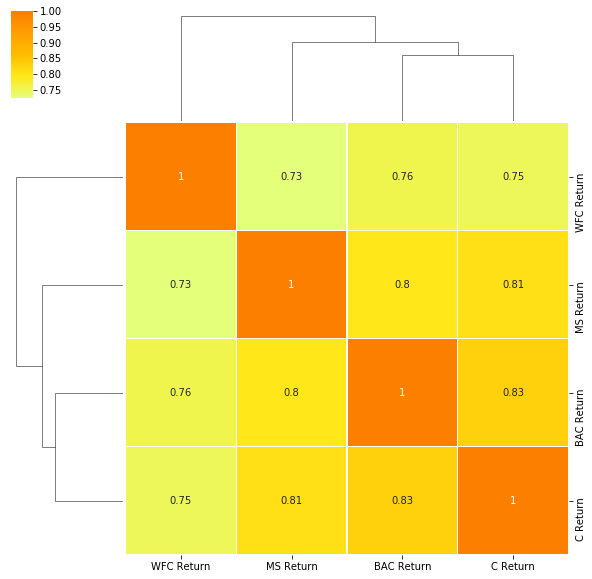

In [13]:
# Heatmap for return of all the banks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="cool",linewidths=.1, annot= True)

sns.clustermap(returns.corr(), cmap="Wistia",linewidths=.1, annot= True)

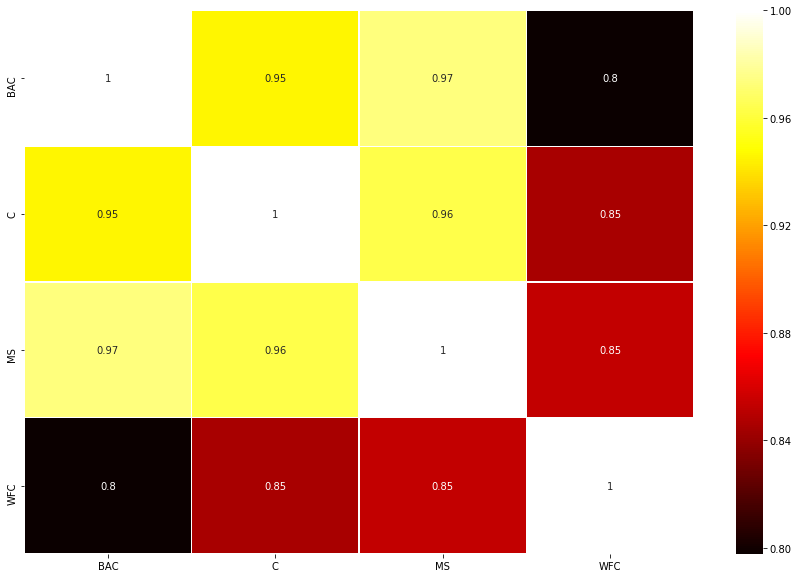

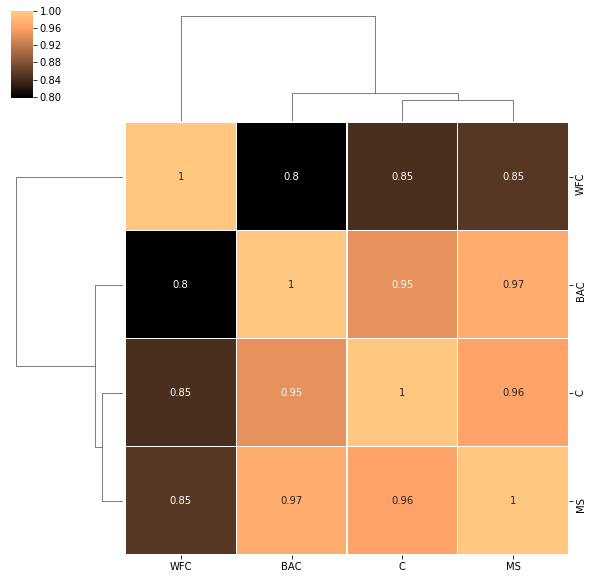

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="hot",linewidths=.1, annot= True)

sns.clustermap(df.corr(), cmap="copper",linewidths=.1, annot= True)

In [15]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
BAC: 25000.0
C: 25000.0
MS: 25000.0
WFC: 25000.0


In [16]:
print('Number of Shares:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
BAC: 1763
C: 796
MS: 949
WFC: 1188


In [17]:
print('Beginning Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
BAC: $24993.27
C: $24976.28
MS: $24995.65
WFC: $24994.36


In [18]:
print('Current Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
BAC: $42705.91
C: $40294.18
MS: $36565.49
WFC: $52629.93


In [19]:
result = []
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $172195.51
